<a href="https://colab.research.google.com/github/s2li2/AIDL.Sara/blob/main/CNN_model_codeURL(Gender).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/traindata'  # Update with your actual path
test_dir = '/content/drive/MyDrive/testdata'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/traindata/men')))
print(len(os.listdir('/content/drive/MyDrive/traindata/women')))
print(len(os.listdir('/content/drive/MyDrive/testdata/men')))
print(len(os.listdir('/content/drive/MyDrive/testdata/women')))

1000
1000
300
300


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 1585 images belonging to 2 classes.
Found 396 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
50/50 [==============================] - 380s 7s/step - loss: 4.9322 - accuracy: 0.5672 - val_loss: 3.3948 - val_accuracy: 0.4848
Epoch 2/30
50/50 [==============================] - 332s 7s/step - loss: 2.3514 - accuracy: 0.6032 - val_loss: 10.0356 - val_accuracy: 0.4949
Epoch 3/30
50/50 [==============================] - 342s 7s/step - loss: 1.3640 - accuracy: 0.5968 - val_loss: 4.7132 - val_accuracy: 0.4646
Epoch 4/30
50/50 [==============================] - 327s 6s/step - loss: 1.2062 - accuracy: 0.6013 - val_loss: 2.1973 - val_accuracy: 0.4798
Epoch 5/30
50/50 [==============================] - 350s 7s/step - loss: 1.0037 - accuracy: 0.6013 - val_loss: 1.3351 - val_accuracy: 0.4848
Epoch 6/30
50/50 [==============================] - 322s 6s/step - loss: 0.8522 - accuracy: 0.6284 - val_loss: 7.2267 - val_accuracy: 0.5025
Epoch 7/30
50/50 [==============================] - 332s 7s/step - loss: 0.7211 - accuracy: 0.6631 - val_loss: 0.9829 - val_accuracy: 0.5177
Epoch 8/30
5

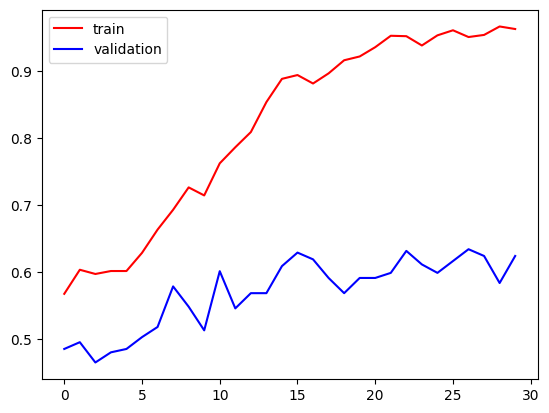

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

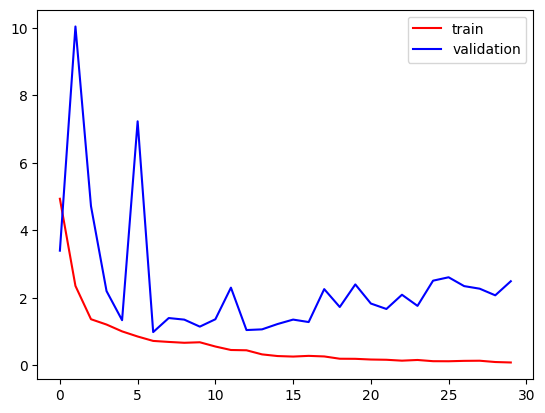

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 599 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

19/19 [==============================] - 103s 6s/step
[[7.31121659e-01]
 [9.99781847e-01]
 [6.98150635e-01]
 [3.91175236e-05]
 [1.81001924e-05]
 [9.02331293e-01]
 [2.79739970e-06]
 [9.52621281e-01]
 [9.05516185e-03]
 [5.68404980e-03]
 [9.98034656e-01]
 [7.23913491e-01]
 [1.31170182e-02]
 [8.01627448e-06]
 [3.62958235e-04]
 [3.74513626e-01]
 [1.09031543e-01]
 [9.99999940e-01]
 [5.33613861e-01]
 [1.54571652e-01]
 [6.98337855e-04]
 [3.64123791e-01]
 [3.27372763e-05]
 [9.08061683e-01]
 [1.94290295e-01]
 [2.65664403e-05]
 [4.51993721e-04]
 [1.06246494e-01]
 [4.88308698e-01]
 [2.97126845e-02]
 [4.88125283e-04]
 [2.63139664e-05]
 [9.18760657e-01]
 [9.98489499e-01]
 [1.00000000e+00]
 [9.98271048e-01]
 [9.95857775e-01]
 [9.87574518e-01]
 [9.98156369e-01]
 [1.00000000e+00]
 [6.73242204e-04]
 [1.79341484e-08]
 [3.69010359e-01]
 [9.99611378e-01]
 [9.25846636e-01]
 [1.28365546e-05]
 [1.07232518e-04]
 [8.90644133e-01]
 [5.55617917e-05]
 [1.84722521e-05]
 [2.58240569e-03]
 [9.62056518e-01]
 [9.923944

In [13]:
len(predictions)

599

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[163 137]
 [179 120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.54      0.51       300
           1       0.47      0.40      0.43       299

    accuracy                           0.47       599
   macro avg       0.47      0.47      0.47       599
weighted avg       0.47      0.47      0.47       599

